In [1]:
from config import config
config = config.Configuration()

In [2]:
# run previous notebooks if necessary
if not "run_prev_notebooks" in locals(): # use case: this notebook
    run_prev_notebooks = False
    %run "1_data_preparation.ipynb"
    %run "2_model.ipynb"

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['Input[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [3]:
import os
import time
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
timestr = time.strftime("%Y%m%d-%H%M")

# Define callbacks for the early stopping of training, LearningRateScheduler and model checkpointing
checkpoint = ModelCheckpoint(config.model_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = False)

#reduceonplatea; It can be useful when using adam as optimizer
#Reduce learning rate when a metric has stopped improving (after some patience,reduce by a factor of 0.33, new_lr = lr * factor).
#cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.33,
                                   patience=4, verbose=1, mode='min',
                                   min_delta=0.0001, cooldown=4, min_lr=1e-16)

#early = EarlyStopping(monitor="val_loss", mode="min", verbose=2, patience=15)

log_dir = os.path.join(f'./logs/UNet_{timestr}_{OPTIMIZER_NAME}_{LOSS_NAME}_{config.input_shape[0]}')
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

callbacks_list = [checkpoint, tensorboard] #reduceLROnPlat is not required with adaDelta

In [6]:
%%time
loss_history = model.fit(
        x=X_train,
        y=y_train,
        epochs=config.NB_EPOCHS,
        steps_per_epoch=len(X_train) // config.BATCH_SIZE,
        validation_data=(X_val, y_val),
        shuffle=True,
        validation_steps=len(X_val) // config.BATCH_SIZE,
        batch_size=config.BATCH_SIZE,
        callbacks=callbacks_list
        # use_multiprocessing=True
)
print("Training completed.")

Epoch 1/100
73/73 [==============================] - ETA: 0s - loss: -0.1225 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 2.4659e-06 - sensitivity: nan - accuracy: 0.0024 
Epoch 1: val_loss improved from inf to -0.17365, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1941s 27s/step - loss: -0.1225 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 2.4659e-06 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.1736 - val_dice_coef: 0.0426 - val_dice_loss: 0.9574 - val_specificity: -5.6656e-07 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 2/100
73/73 [==============================] - ETA: 0s - loss: -0.0361 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 2: val_loss improved from -0.17365 to -0.18128, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1918s 26s/step - loss: -0.0361 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.1813 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 3/100
73/73 [==============================] - ETA: 0s - loss: -0.0987 - dice_coef: 0.0629 - dice_loss: 0.9371 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 3: val_loss did not improve from -0.18128
73/73 [==============================] - 1915s 26s/step - loss: -0.0987 - dice_coef: 0.0629 - dice_loss: 0.9371 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.1789 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 4/100
73/73 [==============================] - ETA: 0s - loss: -0.0799 - dice_coef: 0.0609 - dice_loss: 0.9391 - specificity

INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1905s 26s/step - loss: -0.0799 - dice_coef: 0.0609 - dice_loss: 0.9391 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.1819 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 5/100
73/73 [==============================] - ETA: 0s - loss: 0.0159 - dice_coef: 0.0604 - dice_loss: 0.9396 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 5: val_loss improved from -0.18194 to -0.20335, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1906s 26s/step - loss: 0.0159 - dice_coef: 0.0604 - dice_loss: 0.9396 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2034 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 6/100
73/73 [==============================] - ETA: 0s - loss: -0.0522 - dice_coef: 0.0607 - dice_loss: 0.9393 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 6: val_loss improved from -0.20335 to -0.20448, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1903s 26s/step - loss: -0.0522 - dice_coef: 0.0607 - dice_loss: 0.9393 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2045 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 7/100
73/73 [==============================] - ETA: 0s - loss: -0.1069 - dice_coef: 0.0664 - dice_loss: 0.9336 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 7: val_loss improved from -0.20448 to -0.20460, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1911s 26s/step - loss: -0.1069 - dice_coef: 0.0664 - dice_loss: 0.9336 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2046 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 8/100
73/73 [==============================] - ETA: 0s - loss: -0.2090 - dice_coef: 0.0636 - dice_loss: 0.9364 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 8: val_loss improved from -0.20460 to -0.20463, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1910s 26s/step - loss: -0.2090 - dice_coef: 0.0636 - dice_loss: 0.9364 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2046 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 9/100
73/73 [==============================] - ETA: 0s - loss: -0.0649 - dice_coef: 0.0549 - dice_loss: 0.9451 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 9: val_loss improved from -0.20463 to -0.20464, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1901s 26s/step - loss: -0.0649 - dice_coef: 0.0549 - dice_loss: 0.9451 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2046 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 10/100
73/73 [==============================] - ETA: 0s - loss: -0.1183 - dice_coef: 0.0658 - dice_loss: 0.9342 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 10: val_loss improved from -0.20464 to -0.20465, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1904s 26s/step - loss: -0.1183 - dice_coef: 0.0658 - dice_loss: 0.9342 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 11/100
73/73 [==============================] - ETA: 0s - loss: -0.1119 - dice_coef: 0.0645 - dice_loss: 0.9355 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 11: val_loss improved from -0.20465 to -0.20466, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1906s 26s/step - loss: -0.1119 - dice_coef: 0.0645 - dice_loss: 0.9355 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 12/100
73/73 [==============================] - ETA: 0s - loss: -0.0048 - dice_coef: 0.0599 - dice_loss: 0.9401 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024
Epoch 12: val_loss improved from -0.20466 to -0.20466, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1898s 26s/step - loss: -0.0048 - dice_coef: 0.0599 - dice_loss: 0.9401 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 13/100
73/73 [==============================] - ETA: 0s - loss: -0.0253 - dice_coef: 0.0618 - dice_loss: 0.9382 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 13: val_loss improved from -0.20466 to -0.20467, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1899s 26s/step - loss: -0.0253 - dice_coef: 0.0618 - dice_loss: 0.9382 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 14/100
73/73 [==============================] - ETA: 0s - loss: -0.0786 - dice_coef: 0.0604 - dice_loss: 0.9396 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 14: val_loss improved from -0.20467 to -0.20467, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1900s 26s/step - loss: -0.0786 - dice_coef: 0.0604 - dice_loss: 0.9396 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 15/100
73/73 [==============================] - ETA: 0s - loss: -0.1238 - dice_coef: 0.0630 - dice_loss: 0.9370 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 15: val_loss improved from -0.20467 to -0.20468, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1901s 26s/step - loss: -0.1238 - dice_coef: 0.0630 - dice_loss: 0.9370 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 16/100
73/73 [==============================] - ETA: 0s - loss: -0.1017 - dice_coef: 0.0611 - dice_loss: 0.9389 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 16: val_loss improved from -0.20468 to -0.20468, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1896s 26s/step - loss: -0.1017 - dice_coef: 0.0611 - dice_loss: 0.9389 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 17/100
73/73 [==============================] - ETA: 0s - loss: -0.0813 - dice_coef: 0.0578 - dice_loss: 0.9422 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 17: val_loss improved from -0.20468 to -0.20469, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1897s 26s/step - loss: -0.0813 - dice_coef: 0.0578 - dice_loss: 0.9422 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 18/100
73/73 [==============================] - ETA: 0s - loss: -0.0675 - dice_coef: 0.0636 - dice_loss: 0.9364 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 18: val_loss improved from -0.20469 to -0.20469, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1896s 26s/step - loss: -0.0675 - dice_coef: 0.0636 - dice_loss: 0.9364 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 19/100
73/73 [==============================] - ETA: 0s - loss: -0.0804 - dice_coef: 0.0575 - dice_loss: 0.9425 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0027 
Epoch 19: val_loss improved from -0.20469 to -0.20469, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1888s 26s/step - loss: -0.0804 - dice_coef: 0.0575 - dice_loss: 0.9425 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0027 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 20/100
73/73 [==============================] - ETA: 0s - loss: -0.0935 - dice_coef: 0.0684 - dice_loss: 0.9316 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 20: val_loss improved from -0.20469 to -0.20470, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1890s 26s/step - loss: -0.0935 - dice_coef: 0.0684 - dice_loss: 0.9316 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 21/100
73/73 [==============================] - ETA: 0s - loss: -0.0636 - dice_coef: 0.0571 - dice_loss: 0.9429 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 21: val_loss improved from -0.20470 to -0.20470, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1894s 26s/step - loss: -0.0636 - dice_coef: 0.0571 - dice_loss: 0.9429 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 22/100
73/73 [==============================] - ETA: 0s - loss: -0.2089 - dice_coef: 0.0639 - dice_loss: 0.9361 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 22: val_loss improved from -0.20470 to -0.20470, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1917s 26s/step - loss: -0.2089 - dice_coef: 0.0639 - dice_loss: 0.9361 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 23/100
73/73 [==============================] - ETA: 0s - loss: -0.1340 - dice_coef: 0.0700 - dice_loss: 0.9300 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 23: val_loss improved from -0.20470 to -0.20471, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1888s 26s/step - loss: -0.1340 - dice_coef: 0.0700 - dice_loss: 0.9300 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 24/100
73/73 [==============================] - ETA: 0s - loss: 0.0100 - dice_coef: 0.0591 - dice_loss: 0.9409 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 24: val_loss improved from -0.20471 to -0.20471, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1888s 26s/step - loss: 0.0100 - dice_coef: 0.0591 - dice_loss: 0.9409 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 25/100
73/73 [==============================] - ETA: 0s - loss: -0.0721 - dice_coef: 0.0639 - dice_loss: 0.9361 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 25: val_loss improved from -0.20471 to -0.20471, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1889s 26s/step - loss: -0.0721 - dice_coef: 0.0639 - dice_loss: 0.9361 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 26/100
73/73 [==============================] - ETA: 0s - loss: -0.1103 - dice_coef: 0.0592 - dice_loss: 0.9408 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 26: val_loss improved from -0.20471 to -0.20472, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1892s 26s/step - loss: -0.1103 - dice_coef: 0.0592 - dice_loss: 0.9408 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 27/100
73/73 [==============================] - ETA: 0s - loss: -0.0407 - dice_coef: 0.0567 - dice_loss: 0.9433 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 
Epoch 27: val_loss improved from -0.20472 to -0.20472, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1895s 26s/step - loss: -0.0407 - dice_coef: 0.0567 - dice_loss: 0.9433 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 28/100
73/73 [==============================] - ETA: 0s - loss: -0.1535 - dice_coef: 0.0690 - dice_loss: 0.9310 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0030 
Epoch 28: val_loss improved from -0.20472 to -0.20472, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1899s 26s/step - loss: -0.1535 - dice_coef: 0.0690 - dice_loss: 0.9310 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0030 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 29/100
73/73 [==============================] - ETA: 0s - loss: -0.0139 - dice_coef: 0.0524 - dice_loss: 0.9476 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0019 
Epoch 29: val_loss improved from -0.20472 to -0.20473, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1899s 26s/step - loss: -0.0139 - dice_coef: 0.0524 - dice_loss: 0.9476 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0019 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 30/100
73/73 [==============================] - ETA: 0s - loss: -0.1472 - dice_coef: 0.0737 - dice_loss: 0.9263 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 30: val_loss improved from -0.20473 to -0.20473, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1898s 26s/step - loss: -0.1472 - dice_coef: 0.0737 - dice_loss: 0.9263 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 31/100
73/73 [==============================] - ETA: 0s - loss: 8.7251e-04 - dice_coef: 0.0535 - dice_loss: 0.9465 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026
Epoch 31: val_loss improved from -0.20473 to -0.20473, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1906s 26s/step - loss: 8.7251e-04 - dice_coef: 0.0535 - dice_loss: 0.9465 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 32/100
73/73 [==============================] - ETA: 0s - loss: -0.0526 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 32: val_loss improved from -0.20473 to -0.20473, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1894s 26s/step - loss: -0.0526 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 33/100
73/73 [==============================] - ETA: 0s - loss: -0.0491 - dice_coef: 0.0604 - dice_loss: 0.9396 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 33: val_loss improved from -0.20473 to -0.20474, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1898s 26s/step - loss: -0.0491 - dice_coef: 0.0604 - dice_loss: 0.9396 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 34/100
73/73 [==============================] - ETA: 0s - loss: -0.0788 - dice_coef: 0.0589 - dice_loss: 0.9411 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 
Epoch 34: val_loss improved from -0.20474 to -0.20474, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1893s 26s/step - loss: -0.0788 - dice_coef: 0.0589 - dice_loss: 0.9411 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 35/100
73/73 [==============================] - ETA: 0s - loss: -0.2158 - dice_coef: 0.0676 - dice_loss: 0.9324 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 35: val_loss improved from -0.20474 to -0.20474, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1896s 26s/step - loss: -0.2158 - dice_coef: 0.0676 - dice_loss: 0.9324 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 36/100
73/73 [==============================] - ETA: 0s - loss: -0.0342 - dice_coef: 0.0592 - dice_loss: 0.9408 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 36: val_loss improved from -0.20474 to -0.20474, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1890s 26s/step - loss: -0.0342 - dice_coef: 0.0592 - dice_loss: 0.9408 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 37/100
73/73 [==============================] - ETA: 0s - loss: -0.1278 - dice_coef: 0.0602 - dice_loss: 0.9398 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 37: val_loss improved from -0.20474 to -0.20475, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1889s 26s/step - loss: -0.1278 - dice_coef: 0.0602 - dice_loss: 0.9398 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 38/100
73/73 [==============================] - ETA: 0s - loss: -0.2077 - dice_coef: 0.0664 - dice_loss: 0.9336 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 38: val_loss improved from -0.20475 to -0.20475, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1893s 26s/step - loss: -0.2077 - dice_coef: 0.0664 - dice_loss: 0.9336 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2047 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 39/100
73/73 [==============================] - ETA: 0s - loss: -0.0806 - dice_coef: 0.0647 - dice_loss: 0.9353 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 39: val_loss improved from -0.20475 to -0.20475, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1876s 26s/step - loss: -0.0806 - dice_coef: 0.0647 - dice_loss: 0.9353 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 40/100
73/73 [==============================] - ETA: 0s - loss: -0.1818 - dice_coef: 0.0571 - dice_loss: 0.9429 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 40: val_loss improved from -0.20475 to -0.20475, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1887s 26s/step - loss: -0.1818 - dice_coef: 0.0571 - dice_loss: 0.9429 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 41/100
73/73 [==============================] - ETA: 0s - loss: -0.1000 - dice_coef: 0.0614 - dice_loss: 0.9386 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 
Epoch 41: val_loss improved from -0.20475 to -0.20475, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1883s 26s/step - loss: -0.1000 - dice_coef: 0.0614 - dice_loss: 0.9386 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 42/100
73/73 [==============================] - ETA: 0s - loss: 0.0636 - dice_coef: 0.0594 - dice_loss: 0.9406 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 42: val_loss improved from -0.20475 to -0.20476, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1887s 26s/step - loss: 0.0636 - dice_coef: 0.0594 - dice_loss: 0.9406 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 43/100
73/73 [==============================] - ETA: 0s - loss: -0.1588 - dice_coef: 0.0650 - dice_loss: 0.9350 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0019 
Epoch 43: val_loss improved from -0.20476 to -0.20476, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


73/73 [==============================] - ETA: 0s - loss: -0.1680 - dice_coef: 0.0665 - dice_loss: 0.9335 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 44: val_loss improved from -0.20476 to -0.20476, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1901s 26s/step - loss: -0.1680 - dice_coef: 0.0665 - dice_loss: 0.9335 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 45/100
73/73 [==============================] - ETA: 0s - loss: 0.0019 - dice_coef: 0.0574 - dice_loss: 0.9426 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0029  
Epoch 45: val_loss improved from -0.20476 to -0.20476, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1888s 26s/step - loss: 0.0019 - dice_coef: 0.0574 - dice_loss: 0.9426 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0029 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 46/100
73/73 [==============================] - ETA: 0s - loss: -0.1638 - dice_coef: 0.0645 - dice_loss: 0.9355 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0017 
Epoch 46: val_loss improved from -0.20476 to -0.20476, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1902s 26s/step - loss: -0.1638 - dice_coef: 0.0645 - dice_loss: 0.9355 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0017 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 47/100
73/73 [==============================] - ETA: 0s - loss: -0.0747 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0030 
Epoch 47: val_loss improved from -0.20476 to -0.20477, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1893s 26s/step - loss: -0.0747 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0030 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 48/100
73/73 [==============================] - ETA: 0s - loss: -0.1902 - dice_coef: 0.0615 - dice_loss: 0.9385 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 
Epoch 48: val_loss improved from -0.20477 to -0.20477, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1893s 26s/step - loss: -0.1902 - dice_coef: 0.0615 - dice_loss: 0.9385 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 49/100
73/73 [==============================] - ETA: 0s - loss: -0.1936 - dice_coef: 0.0617 - dice_loss: 0.9383 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 49: val_loss improved from -0.20477 to -0.20477, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1886s 26s/step - loss: -0.1936 - dice_coef: 0.0617 - dice_loss: 0.9383 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 50/100
73/73 [==============================] - ETA: 0s - loss: -0.0653 - dice_coef: 0.0591 - dice_loss: 0.9409 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 50: val_loss improved from -0.20477 to -0.20477, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1901s 26s/step - loss: -0.0653 - dice_coef: 0.0591 - dice_loss: 0.9409 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 51/100
73/73 [==============================] - ETA: 0s - loss: 0.0425 - dice_coef: 0.0616 - dice_loss: 0.9384 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 51: val_loss improved from -0.20477 to -0.20477, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1916s 26s/step - loss: 0.0425 - dice_coef: 0.0616 - dice_loss: 0.9384 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 52/100
73/73 [==============================] - ETA: 0s - loss: -0.0810 - dice_coef: 0.0668 - dice_loss: 0.9332 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 52: val_loss improved from -0.20477 to -0.20477, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1941s 27s/step - loss: -0.0810 - dice_coef: 0.0668 - dice_loss: 0.9332 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 53/100
73/73 [==============================] - ETA: 0s - loss: -0.0101 - dice_coef: 0.0565 - dice_loss: 0.9435 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 53: val_loss improved from -0.20477 to -0.20477, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1937s 27s/step - loss: -0.0101 - dice_coef: 0.0565 - dice_loss: 0.9435 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 54/100
73/73 [==============================] - ETA: 0s - loss: -0.0909 - dice_coef: 0.0574 - dice_loss: 0.9426 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 54: val_loss improved from -0.20477 to -0.20478, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1940s 27s/step - loss: -0.0909 - dice_coef: 0.0574 - dice_loss: 0.9426 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 55/100
73/73 [==============================] - ETA: 0s - loss: -0.2270 - dice_coef: 0.0720 - dice_loss: 0.9280 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0027 
Epoch 55: val_loss improved from -0.20478 to -0.20478, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1936s 27s/step - loss: -0.2270 - dice_coef: 0.0720 - dice_loss: 0.9280 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0027 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 56/100
73/73 [==============================] - ETA: 0s - loss: 0.0395 - dice_coef: 0.0571 - dice_loss: 0.9429 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 56: val_loss improved from -0.20478 to -0.20478, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1935s 27s/step - loss: 0.0395 - dice_coef: 0.0571 - dice_loss: 0.9429 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 57/100
73/73 [==============================] - ETA: 0s - loss: -0.0896 - dice_coef: 0.0588 - dice_loss: 0.9412 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0019 
Epoch 57: val_loss improved from -0.20478 to -0.20478, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1936s 27s/step - loss: -0.0896 - dice_coef: 0.0588 - dice_loss: 0.9412 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0019 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 58/100
73/73 [==============================] - ETA: 0s - loss: -0.1310 - dice_coef: 0.0666 - dice_loss: 0.9334 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0031 
Epoch 58: val_loss improved from -0.20478 to -0.20478, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1933s 27s/step - loss: -0.1310 - dice_coef: 0.0666 - dice_loss: 0.9334 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0031 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 59/100
73/73 [==============================] - ETA: 0s - loss: -0.1489 - dice_coef: 0.0610 - dice_loss: 0.9390 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0019 
Epoch 59: val_loss improved from -0.20478 to -0.20478, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1942s 27s/step - loss: -0.1489 - dice_coef: 0.0610 - dice_loss: 0.9390 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0019 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 60/100
73/73 [==============================] - ETA: 0s - loss: -0.0765 - dice_coef: 0.0641 - dice_loss: 0.9359 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 60: val_loss improved from -0.20478 to -0.20478, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1936s 27s/step - loss: -0.0765 - dice_coef: 0.0641 - dice_loss: 0.9359 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 61/100
73/73 [==============================] - ETA: 0s - loss: -0.0133 - dice_coef: 0.0644 - dice_loss: 0.9356 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 61: val_loss improved from -0.20478 to -0.20478, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1930s 26s/step - loss: -0.0133 - dice_coef: 0.0644 - dice_loss: 0.9356 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 62/100
73/73 [==============================] - ETA: 0s - loss: -0.1221 - dice_coef: 0.0674 - dice_loss: 0.9326 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 62: val_loss improved from -0.20478 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1921s 26s/step - loss: -0.1221 - dice_coef: 0.0674 - dice_loss: 0.9326 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 63/100
73/73 [==============================] - ETA: 0s - loss: -0.0397 - dice_coef: 0.0493 - dice_loss: 0.9507 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 63: val_loss improved from -0.20479 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1931s 26s/step - loss: -0.0397 - dice_coef: 0.0493 - dice_loss: 0.9507 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 64/100
73/73 [==============================] - ETA: 0s - loss: -0.0703 - dice_coef: 0.0659 - dice_loss: 0.9341 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 64: val_loss improved from -0.20479 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1955s 27s/step - loss: -0.0703 - dice_coef: 0.0659 - dice_loss: 0.9341 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 65/100
73/73 [==============================] - ETA: 0s - loss: -0.0727 - dice_coef: 0.0624 - dice_loss: 0.9376 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 65: val_loss improved from -0.20479 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1931s 26s/step - loss: -0.0727 - dice_coef: 0.0624 - dice_loss: 0.9376 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 66/100
73/73 [==============================] - ETA: 0s - loss: -0.0938 - dice_coef: 0.0618 - dice_loss: 0.9382 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 66: val_loss improved from -0.20479 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1921s 26s/step - loss: -0.0938 - dice_coef: 0.0618 - dice_loss: 0.9382 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 67/100
73/73 [==============================] - ETA: 0s - loss: -0.0947 - dice_coef: 0.0574 - dice_loss: 0.9426 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 
Epoch 67: val_loss improved from -0.20479 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1923s 26s/step - loss: -0.0947 - dice_coef: 0.0574 - dice_loss: 0.9426 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 68/100
73/73 [==============================] - ETA: 0s - loss: -0.1536 - dice_coef: 0.0673 - dice_loss: 0.9327 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 68: val_loss improved from -0.20479 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1925s 26s/step - loss: -0.1536 - dice_coef: 0.0673 - dice_loss: 0.9327 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 69/100
73/73 [==============================] - ETA: 0s - loss: -0.0526 - dice_coef: 0.0582 - dice_loss: 0.9418 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 69: val_loss improved from -0.20479 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1948s 27s/step - loss: -0.0526 - dice_coef: 0.0582 - dice_loss: 0.9418 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 70/100
73/73 [==============================] - ETA: 0s - loss: -0.1125 - dice_coef: 0.0650 - dice_loss: 0.9350 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 70: val_loss improved from -0.20479 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1930s 26s/step - loss: -0.1125 - dice_coef: 0.0650 - dice_loss: 0.9350 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 71/100
73/73 [==============================] - ETA: 0s - loss: -0.1697 - dice_coef: 0.0605 - dice_loss: 0.9395 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 71: val_loss improved from -0.20479 to -0.20479, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1941s 27s/step - loss: -0.1697 - dice_coef: 0.0605 - dice_loss: 0.9395 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 72/100
73/73 [==============================] - ETA: 0s - loss: -0.0561 - dice_coef: 0.0635 - dice_loss: 0.9365 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 72: val_loss improved from -0.20479 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1932s 26s/step - loss: -0.0561 - dice_coef: 0.0635 - dice_loss: 0.9365 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 73/100
73/73 [==============================] - ETA: 0s - loss: -0.0328 - dice_coef: 0.0599 - dice_loss: 0.9401 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 73: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1937s 27s/step - loss: -0.0328 - dice_coef: 0.0599 - dice_loss: 0.9401 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 74/100
73/73 [==============================] - ETA: 0s - loss: -0.0468 - dice_coef: 0.0625 - dice_loss: 0.9375 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 74: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1934s 27s/step - loss: -0.0468 - dice_coef: 0.0625 - dice_loss: 0.9375 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 75/100
73/73 [==============================] - ETA: 0s - loss: -0.0050 - dice_coef: 0.0614 - dice_loss: 0.9386 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024    
Epoch 75: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1942s 27s/step - loss: -0.0050 - dice_coef: 0.0614 - dice_loss: 0.9386 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 76/100
73/73 [==============================] - ETA: 0s - loss: -0.1085 - dice_coef: 0.0617 - dice_loss: 0.9383 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 76: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1929s 27s/step - loss: -0.1085 - dice_coef: 0.0617 - dice_loss: 0.9383 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 77/100
73/73 [==============================] - ETA: 0s - loss: -0.1525 - dice_coef: 0.0636 - dice_loss: 0.9364 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 77: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1937s 27s/step - loss: -0.1525 - dice_coef: 0.0636 - dice_loss: 0.9364 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 78/100
72/73 [============================>.] - ETA: 25s - loss: -0.0023 - dice_coef: 0.0617 - dice_loss: 0.9383 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1933s 26s/step - loss: -0.0064 - dice_coef: 0.0615 - dice_loss: 0.9385 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 79/100
73/73 [==============================] - ETA: 0s - loss: -0.0245 - dice_coef: 0.0594 - dice_loss: 0.9406 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 
Epoch 79: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1946s 27s/step - loss: -0.0245 - dice_coef: 0.0594 - dice_loss: 0.9406 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0024 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 80/100
73/73 [==============================] - ETA: 0s - loss: -0.2160 - dice_coef: 0.0609 - dice_loss: 0.9391 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 
Epoch 80: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1934s 27s/step - loss: -0.2160 - dice_coef: 0.0609 - dice_loss: 0.9391 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0023 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 81/100
73/73 [==============================] - ETA: 0s - loss: -0.0739 - dice_coef: 0.0618 - dice_loss: 0.9382 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 81: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1913s 26s/step - loss: -0.0739 - dice_coef: 0.0618 - dice_loss: 0.9382 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 82/100
73/73 [==============================] - ETA: 0s - loss: -0.2211 - dice_coef: 0.0673 - dice_loss: 0.9327 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0028 
Epoch 82: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1886s 26s/step - loss: -0.2211 - dice_coef: 0.0673 - dice_loss: 0.9327 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0028 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 83/100
73/73 [==============================] - ETA: 0s - loss: -0.1211 - dice_coef: 0.0601 - dice_loss: 0.9399 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 83: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1906s 26s/step - loss: -0.1211 - dice_coef: 0.0601 - dice_loss: 0.9399 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 84/100
73/73 [==============================] - ETA: 0s - loss: -0.1135 - dice_coef: 0.0620 - dice_loss: 0.9380 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 84: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1880s 26s/step - loss: -0.1135 - dice_coef: 0.0620 - dice_loss: 0.9380 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 85/100
73/73 [==============================] - ETA: 0s - loss: -0.1225 - dice_coef: 0.0617 - dice_loss: 0.9383 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 85: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1894s 26s/step - loss: -0.1225 - dice_coef: 0.0617 - dice_loss: 0.9383 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 86/100
73/73 [==============================] - ETA: 0s - loss: -0.2222 - dice_coef: 0.0631 - dice_loss: 0.9369 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 86: val_loss improved from -0.20480 to -0.20480, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1882s 26s/step - loss: -0.2222 - dice_coef: 0.0631 - dice_loss: 0.9369 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 87/100
73/73 [==============================] - ETA: 0s - loss: -0.0395 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 87: val_loss improved from -0.20480 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1888s 26s/step - loss: -0.0395 - dice_coef: 0.0622 - dice_loss: 0.9378 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 88/100
73/73 [==============================] - ETA: 0s - loss: -0.1326 - dice_coef: 0.0602 - dice_loss: 0.9398 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0027 
Epoch 88: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1927s 27s/step - loss: -0.1326 - dice_coef: 0.0602 - dice_loss: 0.9398 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0027 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 89/100
73/73 [==============================] - ETA: 0s - loss: -0.0969 - dice_coef: 0.0569 - dice_loss: 0.9431 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0019 
Epoch 89: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1887s 26s/step - loss: -0.0969 - dice_coef: 0.0569 - dice_loss: 0.9431 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0019 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 90/100
73/73 [==============================] - ETA: 0s - loss: -0.0816 - dice_coef: 0.0636 - dice_loss: 0.9364 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 90: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1890s 26s/step - loss: -0.0816 - dice_coef: 0.0636 - dice_loss: 0.9364 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 91/100
73/73 [==============================] - ETA: 0s - loss: -0.1381 - dice_coef: 0.0674 - dice_loss: 0.9326 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 91: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1889s 26s/step - loss: -0.1381 - dice_coef: 0.0674 - dice_loss: 0.9326 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 92/100
73/73 [==============================] - ETA: 0s - loss: -0.1696 - dice_coef: 0.0604 - dice_loss: 0.9396 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 
Epoch 92: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1903s 26s/step - loss: -0.1696 - dice_coef: 0.0604 - dice_loss: 0.9396 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0026 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 93/100
73/73 [==============================] - ETA: 0s - loss: -0.0622 - dice_coef: 0.0623 - dice_loss: 0.9377 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 
Epoch 93: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1908s 26s/step - loss: -0.0622 - dice_coef: 0.0623 - dice_loss: 0.9377 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0025 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 94/100
73/73 [==============================] - ETA: 0s - loss: -0.0615 - dice_coef: 0.0520 - dice_loss: 0.9480 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0018 
Epoch 94: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1881s 26s/step - loss: -0.0615 - dice_coef: 0.0520 - dice_loss: 0.9480 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0018 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 95/100
73/73 [==============================] - ETA: 0s - loss: -0.0813 - dice_coef: 0.0707 - dice_loss: 0.9293 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 95: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1883s 26s/step - loss: -0.0813 - dice_coef: 0.0707 - dice_loss: 0.9293 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 96/100
73/73 [==============================] - ETA: 0s - loss: -0.1490 - dice_coef: 0.0612 - dice_loss: 0.9388 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0027 
Epoch 96: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1887s 26s/step - loss: -0.1490 - dice_coef: 0.0612 - dice_loss: 0.9388 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0027 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 97/100
73/73 [==============================] - ETA: 0s - loss: -0.1124 - dice_coef: 0.0645 - dice_loss: 0.9355 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 
Epoch 97: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1831s 25s/step - loss: -0.1124 - dice_coef: 0.0645 - dice_loss: 0.9355 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 98/100
73/73 [==============================] - ETA: 0s - loss: -0.1291 - dice_coef: 0.0613 - dice_loss: 0.9387 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 
Epoch 98: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1362s 19s/step - loss: -0.1291 - dice_coef: 0.0613 - dice_loss: 0.9387 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0021 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Epoch 99/100
73/73 [==============================] - ETA: 0s - loss: -0.1986 - dice_coef: 0.0623 - dice_loss: 0.9377 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 
Epoch 100: val_loss improved from -0.20481 to -0.20481, saving model to /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/assets


73/73 [==============================] - 1368s 19s/step - loss: -0.1986 - dice_coef: 0.0623 - dice_loss: 0.9377 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0020 - val_loss: -0.2048 - val_dice_coef: 0.0427 - val_dice_loss: 0.9573 - val_specificity: 0.0000e+00 - val_sensitivity: nan - val_accuracy: 0.0021
Training completed.
CPU times: user 38d 14h 12min 21s, sys: 3d 16h 20min 11s, total: 42d 6h 32min 33s
Wall time: 2d 4h 32min 30s


In [7]:
if not os.path.exists(config.model_path):
    os.makedirs(config.model_path)

acc     = round(100*loss_history.history['accuracy'][-1], 4)
val_acc = round(100*loss_history.history['val_accuracy'][-1], 4)
timestr = time.strftime("%Y%m%d-%H%M")
model_path = os.path.join(f'{config.model_path}{timestr.replace("-","_")}_{OPTIMIZER_NAME}_{LOSS_NAME}_{config.input_shape[0]}.h5')
print(model_path)
model.save(model_path)

# The weights without the model architecture can also be saved. Just saving the weights is more efficent.
# weight_path="./saved_weights/UNet/{}/".format(timestr)
# if not os.path.exists(weight_path):
#     os.makedirs(weight_path)
# weight_path=weight_path + "{}_weights.best.hdf5".format('UNet_model')
# print(weight_path)

/home/jovyan/work/saved_data/south_africa_tree_stock/saved_models/20220404_1826_AdaDelta_weightmap_tversky_256.h5


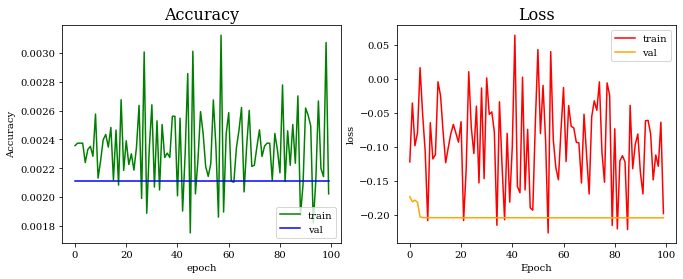

23/23 [==============================] - 73s 3s/step - loss: -0.1939 - dice_coef: 0.0762 - dice_loss: 0.9238 - specificity: 0.0000e+00 - sensitivity: nan - accuracy: 0.0022
accuracy: 0.002021404216066003
loss:     -0.19858451187610626
Validation
accuracy: 0.002109103836119175
loss:     -0.20481114089488983


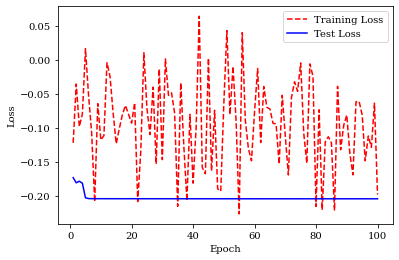

In [12]:
%run "4_evaluation.ipynb"